In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from chart import show, show_collection

import numpy as np
from skimage import io, color, transform, img_as_ubyte
from scipy.fft import fft2, fftshift

Load Eiffel tower image

object type: <class 'numpy.ndarray'>
pixel type: uint8
dims: (318, 200)
size: 0.0606536865234375 Mbytes


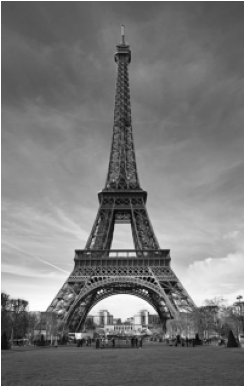

In [3]:
# Load an example image
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Eiffel_Tower_Marsfeld_Paris.jpg/800px-Eiffel_Tower_Marsfeld_Paris.jpg"
image = io.imread(image_url, as_gray=True)
height, width = image.shape
image = img_as_ubyte(transform.resize(image, (height//4, width//4), anti_aliasing=True, preserve_range=True))

show(image, cmap="gray", scale=0.25)
print(f"object type: {type(image)}")
print(f"pixel type: {image.dtype}")
print(f"dims: {image.shape}")
print(f"size: {(image.size * image.itemsize)/ 2**20} Mbytes")


Generate a sinusoidal pattern

freq=0.04


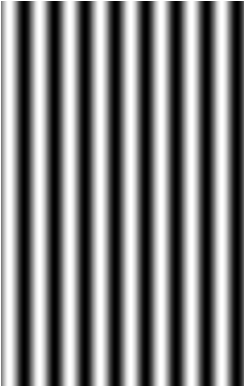

In [4]:
M, N = (height//4, width//4)
y, x = np.indices((M, N))

freq = 8 / N # 8 cycles along the horizontal axis
amp = 20
print(f"freq={freq}")

pattern = np.sin(2 * np.pi * freq * x).astype(np.float32)
pattern = amp * pattern / pattern.max()
show(pattern, cmap="gray", scale=0.25)

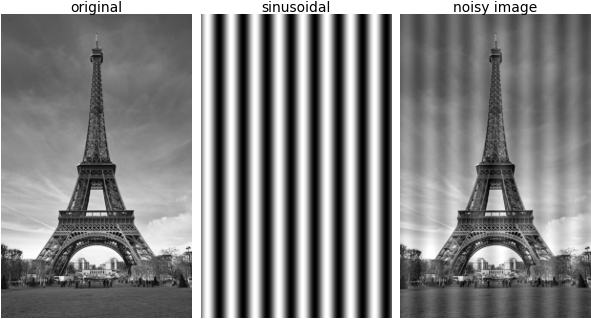

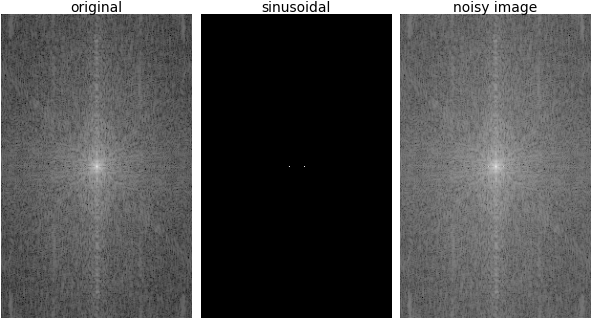

In [7]:
noisy = image.astype(np.float32) + pattern
noisy = np.clip(noisy, 0, 255).astype(np.uint8)

f_uv_ori = fftshift(fft2(image))
f_uv_patt = fftshift(fft2(pattern))
f_uv_noisy = fftshift(fft2(noisy))
spec_ori = np.log(np.abs(f_uv_ori) + 1) # Add 1 to avoid log(0)
spec_patt = np.log(np.abs(f_uv_patt) + 1) # Add 1 to avoid log(0)
spec_noisy = np.log(np.abs(f_uv_noisy) + 1) # Add 1 to avoid log(0)

show_collection([image, pattern, noisy], titles=["original", "sinusoidal", "noisy image"], cmap="gray", scale=0.1)
show_collection([spec_ori, spec_patt, spec_noisy], titles=["original", "sinusoidal", "noisy image"], cmap="gray", scale=0.1)